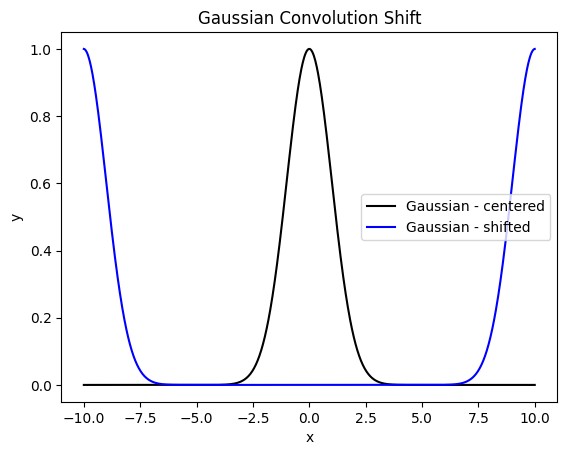

In [333]:
##############Assignment 6#################
###########################################

import numpy as np
from matplotlib import pyplot as plt
from fractions import Fraction
import h5py
import glob
from scipy import signal

#################Problem 1#################
###########################################


#Parts of the code in this assignment were adapted from the lecture notes.

# plt.ion()

#array shifter function - inputs: array, length of array to shift by
def shifter(arr,ty):
    y=arr
    dx=ty
    yft=np.fft.fft(y)
    k=np.arange(len(yft))
    ramp=np.exp(2*np.pi*1J*k*ty/N)
    yft_shift=yft*ramp
    yshift=np.fft.ifft(yft_shift)
    return yshift

#function to generate Gaussian
def gaussf(x, mu,sg):
    gs=np.exp((-(x-mu)**2)/(2*sg**2))
    return gs

#declare function domain
N=1000
x=np.linspace(-10,10,N)

#define Gaussian parameters
mn=0#mean
sigma=1#stdev
y=gaussf(x,mn,sigma)

#shift the array
shifty=len(y)/2#0.5 length of array y to dictate shift magnitude
y_shift=shifter(y,shifty)

#plot centered and shifted Gaussian
plt.clf()
plt.plot(x,y,'-k', ms=0.5,label='Gaussian - centered')
plt.plot(x,y_shift,'-b', ms=0.01,label='Gaussian - shifted')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Gaussian Convolution Shift')
plt.show()

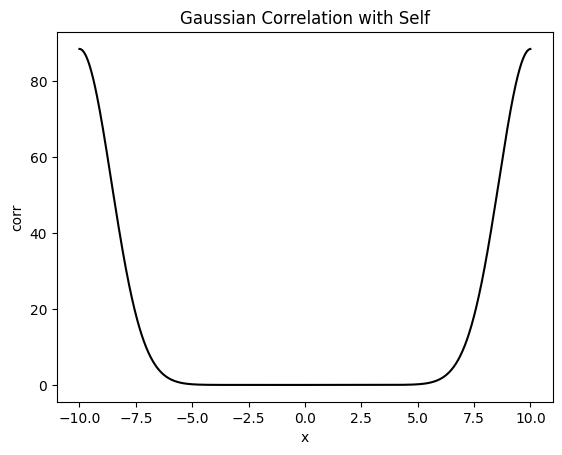

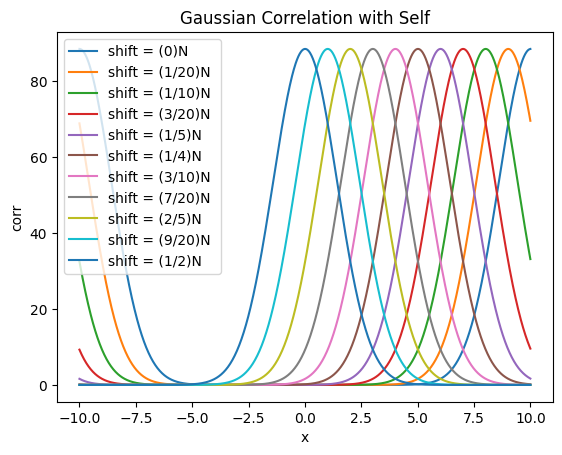

In [334]:
#################Problem 2#################
###########################################

#function to correlate two arrays
def correl(f,g):
    return np.fft.irfft(np.fft.rfft(f)*np.conj(np.fft.rfft(g)))


#Gaussian correlation self
f=gaussf(x,mn,sigma)
g=gaussf(x,mn,sigma)
fgcorr=correl(f,g)

plt.ion()
#plot Gaussian correlation self
plt.clf()
plt.plot(x,fgcorr,'-k', ms=0.5)
plt.xlabel('x')
plt.ylabel('corr')
# plt.legend()
plt.title('Gaussian Correlation with Self')
plt.show()

#shifted Gaussian correlation with self
plt.clf()
g=gaussf(x,mn,sigma)#self
ss=np.linspace(0,500, 11) #shift magnitudes

for i in ss:
    f=gaussf(x,mn,sigma)
    f=shifter(f,i)
    fgcorr=correl(f,g)
    #plot Gaussian correlation self
    fr=0;
    if i!=0:
        fr=Fraction(int(i),N)
    plt.plot(x,fgcorr,ms=0.5,label='shift = ({})N '.format(str(fr)))
    

plt.xlabel('x')
plt.ylabel('corr')
plt.legend()
plt.title('Gaussian Correlation with Self')
plt.show()



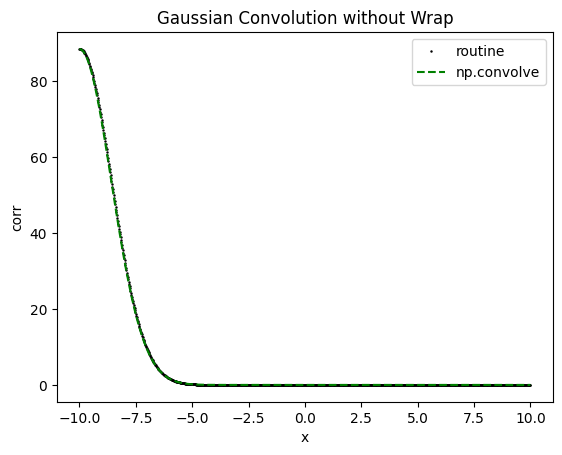

In [336]:
#################Problem 3#################
###########################################

#fft convolution without wrapping around
def fgconv(f,g):
    padl=len(f)+len(g)-1 #m+n-1 length
    fp=np.pad(f,(0,padl-len(f)))#pad zeros to achieve m+n-1 length
    gp=np.pad(g,(0,padl-len(g)))#pad zeros to achieve m+n-1 length
    fgcon=np.fft.irfft(np.fft.rfft(fp)*np.fft.rfft(gp))
    return fgcon[N-2:]

f=gaussf(x,mn,sigma)
ycon=fgconv(f,f)
#plot
plt.clf()
plt.plot(x, ycon,'.k', ms=1.5, label='routine')
plt.plot(x,np.convolve(f,f)[N-1:], '--g', ms=0.5,label='np.convolve')
plt.xlabel('x')
plt.ylabel('corr')
plt.legend()
plt.title('Gaussian Convolution without Wrap')
plt.show()


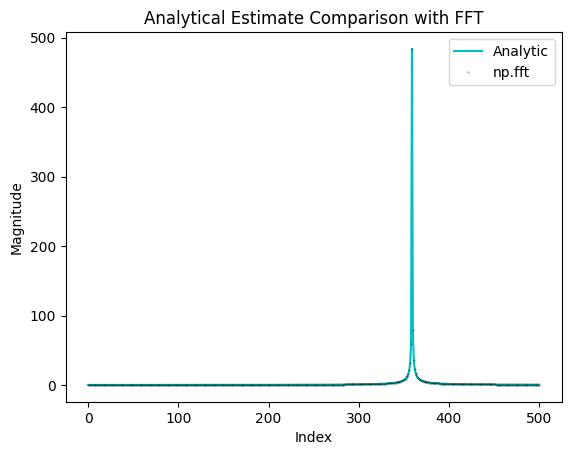

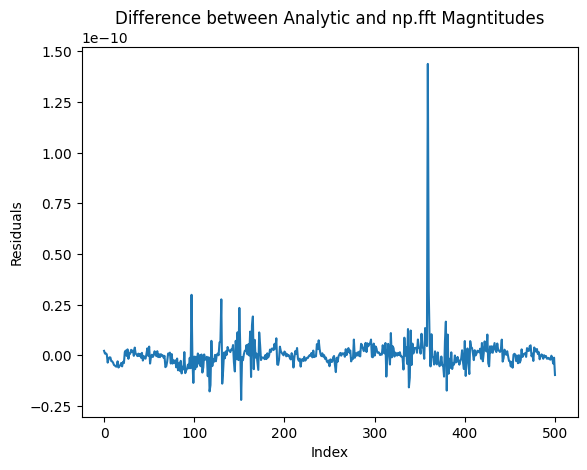

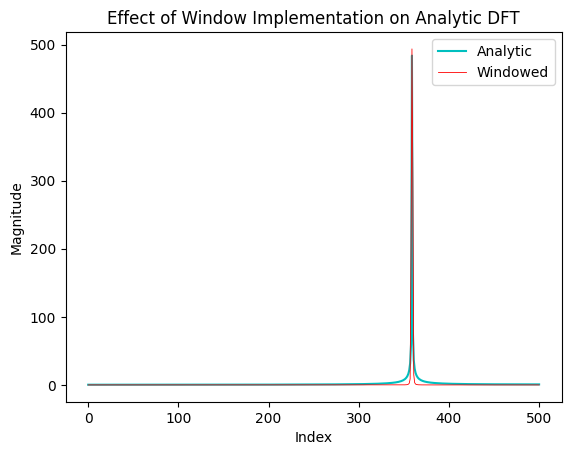

In [251]:
#################Problem 4#################
###########################################
n=1000
xs=np.arange(n)

a=500*np.e#non-integer value selected
k=xs

sin1 = np.sin(2*np.pi*a*xs/n)
ftsin1 = np.fft.rfft(sin1)

y_anlyt=(1/(2j))*((1-np.exp(-2*np.pi*1J*(k-a)))/(1-np.exp(-2*np.pi*1J*(k-a)/n))-
             (1-np.exp(-2*np.pi*1J*(k+a)))/(1-np.exp(-2*np.pi*1J*(k+a)/n)))


y_anlyt=y_anlyt[0:n//2+1]

plt.clf()
plt.plot(np.abs(y_anlyt),'-c', ms=0.5, label='Analytic')
plt.plot(np.abs(ftsin1), '.k', ms=0.4,label='np.fft')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
plt.title('Analytical Estimate Comparison with FFT')
plt.show()

#residuals of fft-analytic
plt.clf()
plt.plot(np.abs(ftsin1)-np.abs(y_anlyt))
plt.xlabel('Index')
plt.ylabel('Residuals')
# plt.legend()
plt.title('Difference between Analytic and np.fft Magntitudes')
plt.show()

###part(d)
fwin=0.5-0.5*np.cos(2*np.pi*xs/n)
y_win=fwin*sin1/np.mean(fwin)
fty_win=np.fft.rfft(y_win)
plt.clf()
plt.plot(np.abs(y_anlyt),'-c', label='Analytic')
plt.plot(np.abs(fty_win), '-r', linewidth=0.6,label='Windowed')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
plt.title('Effect of Window Implementation on Analytic DFT')
plt.show()


In [337]:
winft = np.fft.fft(fwin)
np.round(np.real(winft),3)

array([ 500., -250.,   -0.,   -0.,    0.,    0.,   -0.,   -0.,    0.,
          0.,    0.,    0.,   -0.,    0.,    0.,   -0.,    0.,   -0.,
         -0.,   -0.,    0.,    0.,    0.,    0.,   -0.,   -0.,    0.,
         -0.,   -0.,   -0.,    0.,    0.,    0.,    0.,   -0.,   -0.,
          0.,    0.,    0.,    0.,    0.,   -0.,    0.,   -0.,    0.,
          0.,   -0.,   -0.,    0.,    0.,    0.,   -0.,   -0.,   -0.,
          0.,    0.,    0.,   -0.,    0.,    0.,   -0.,    0.,    0.,
         -0.,   -0.,    0.,   -0.,    0.,   -0.,   -0.,   -0.,    0.,
         -0.,    0.,   -0.,    0.,    0.,   -0.,   -0.,    0.,    0.,
         -0.,    0.,   -0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,   -0.,    0.,    0.,    0.,    0.,   -0.,    0.,
         -0.,   -0.,    0.,   -0.,    0.,    0.,   -0.,    0.,   -0.,
         -0.,   -0.,   -0.,    0.,   -0.,   -0.,   -0.,    0.,    0.,
         -0.,    0.,    0.,    0.,    0.,    0.,   -0.,   -0.,   -0.,
          0.,   -0.,

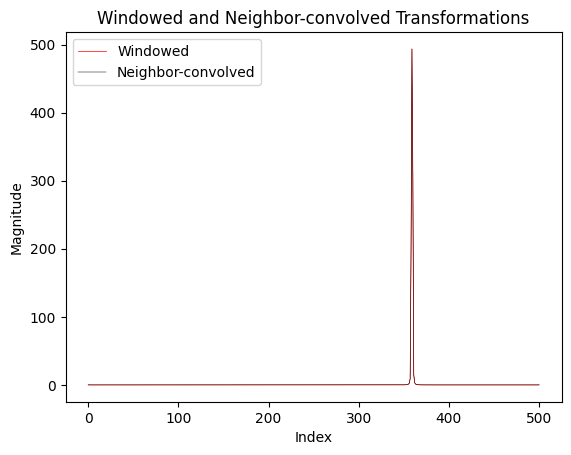

In [338]:
yf=ftsin1
ycon= []
for i in range(len(yf)):
    ycon.append(-(N/4)*yf[i-1]+(N/2)*yf[i]-(N/4)*yf[np.remainder(i+1,len(yf))])
yc=np.array(ycon)*(2/N)

plt.clf()
plt.plot(np.abs(fty_win), '-r', linewidth=0.5, label = "Windowed")
plt.plot(np.abs(yc), '-k', linewidth=0.35, label = "Neighbor-convolved")
plt.legend()
plt.xlabel("Index")
plt.ylabel("Magnitude")
plt.title('Windowed and Neighbor-convolved Transformations')
plt.show()


<Figure size 640x480 with 0 Axes>

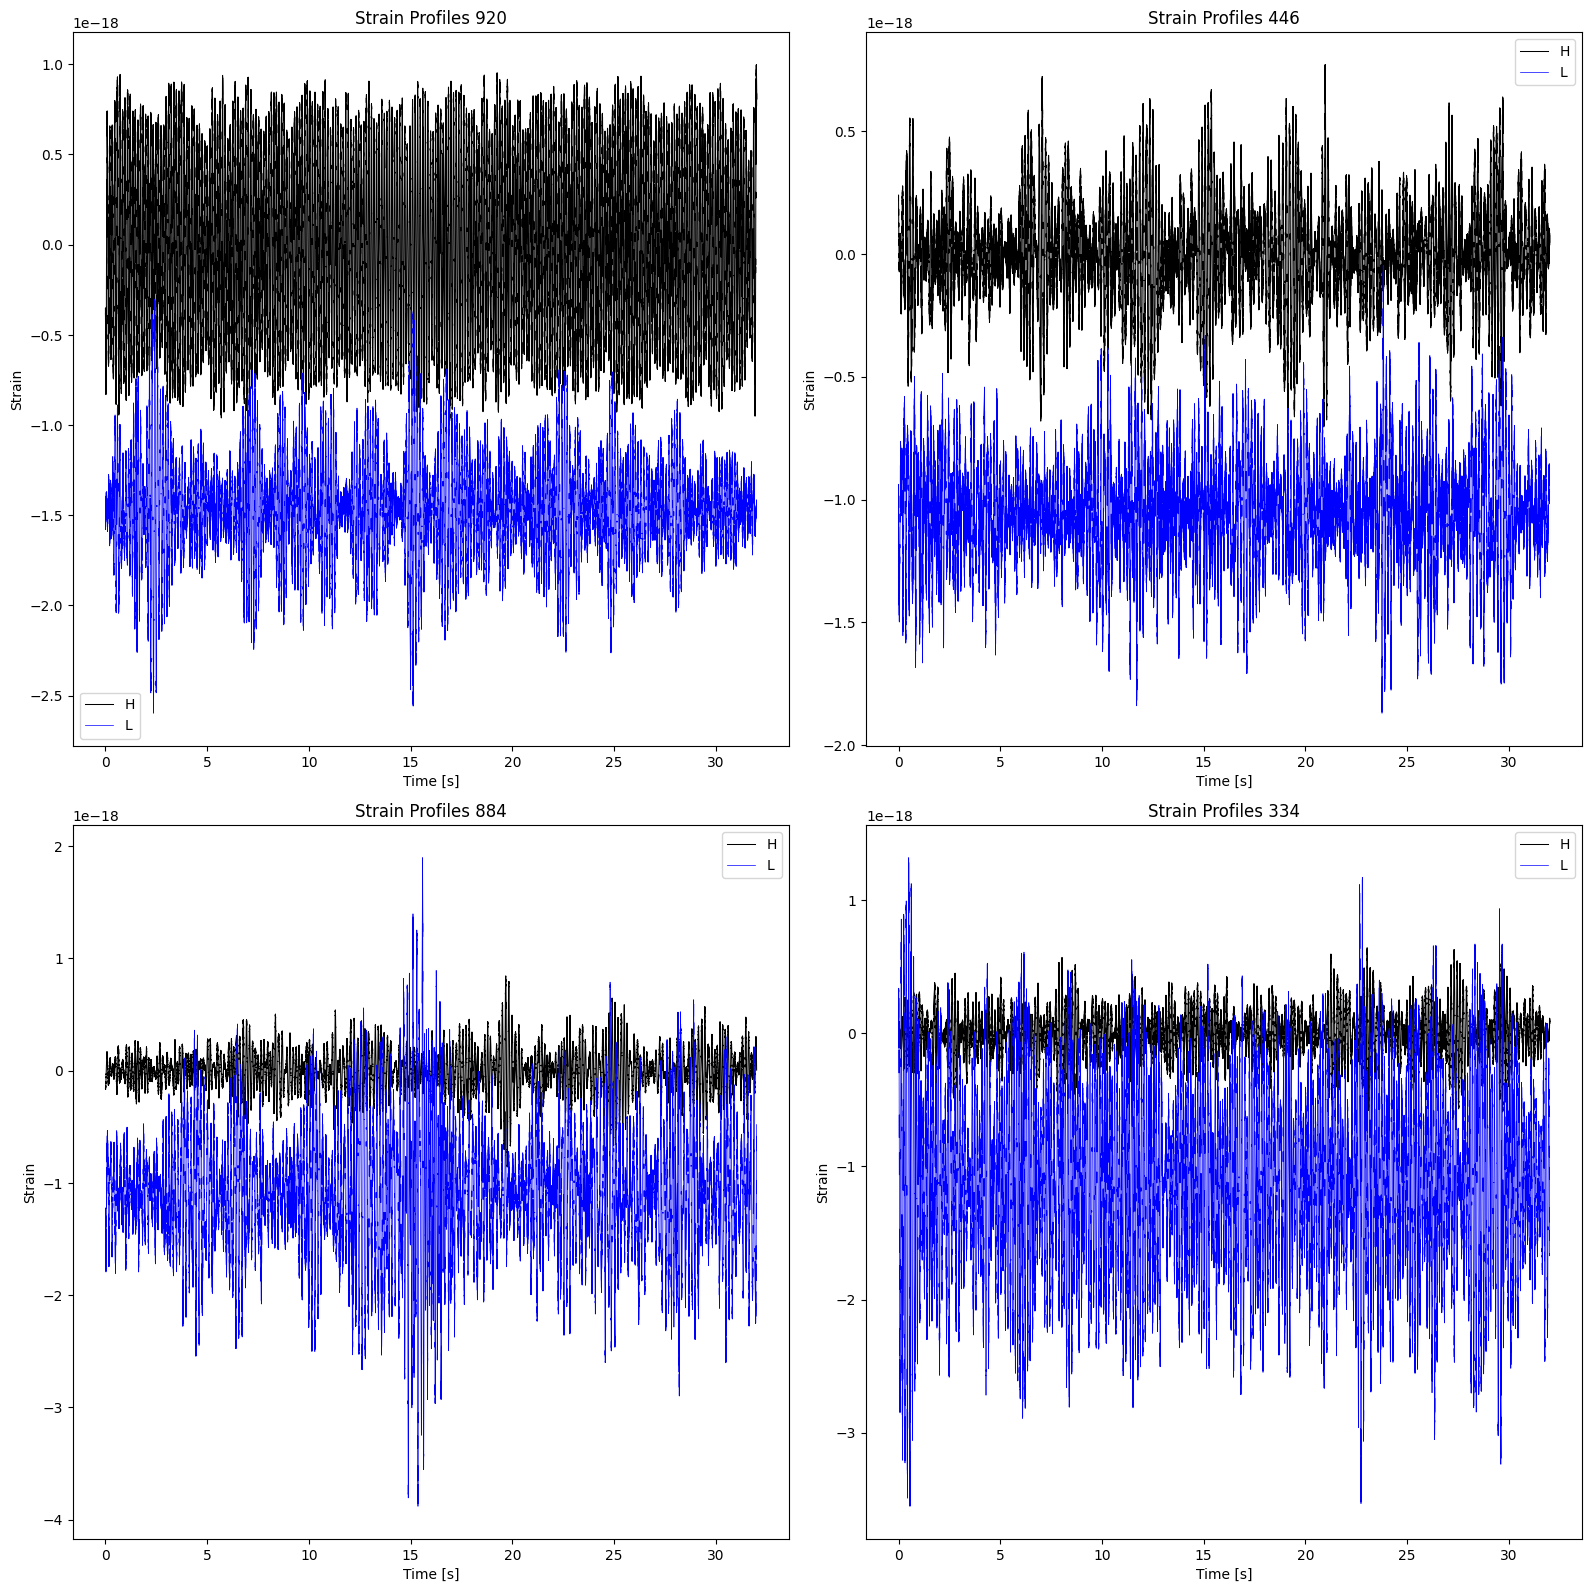

In [164]:
#################Problem 5#################
###########################################
#read files
def read_template(filename):
    dataFile=h5py.File(filename,'r')
    template=dataFile['template']
    tp=template[0]
    tx=template[1]
    return tp,tx
def read_file(filename):
    dataFile=h5py.File(filename,'r')
    dqInfo = dataFile['quality']['simple']
    qmask=dqInfo['DQmask'][...]

    meta=dataFile['meta']
    #gpsStart=meta['GPSstart'].value
    gpsStart=meta['GPSstart'][()]
    #print meta.keys()
    #utc=meta['UTCstart'].value
    utc=meta['UTCstart'][()]
    #duration=meta['Duration'].value
    duration=meta['Duration'][()]
    #strain=dataFile['strain']['Strain'].value
    strain=dataFile['strain']['Strain'][()]
    dt=(1.0*duration)/len(strain)

    dataFile.close()
    return strain,dt,utc

directory = './LOSC/'

Hs=[]
Ls=[]
Ts=[]

HLst=['920','446','884','334']
Tst=['GW150', 'GW151', 'GW170', 'LVT15']

Hs.append(read_file(directory +'H-H1_LOSC_4_V1-1167559920-32.hdf5'))
Hs.append(read_file(directory +'H-H1_LOSC_4_V2-1126259446-32.hdf5'))
Hs.append(read_file(directory +'H-H1_LOSC_4_V2-1128678884-32.hdf5'))
Hs.append(read_file(directory +'H-H1_LOSC_4_V2-1135136334-32.hdf5'))

Ls.append(read_file(directory +'L-L1_LOSC_4_V1-1167559920-32.hdf5'))
Ls.append(read_file(directory +'L-L1_LOSC_4_V2-1126259446-32.hdf5'))
Ls.append(read_file(directory +'L-L1_LOSC_4_V2-1128678884-32.hdf5'))
Ls.append(read_file(directory +'L-L1_LOSC_4_V2-1135136334-32.hdf5'))

Ts.append(read_template(directory +'GW170104_4_template.hdf5'))
Ts.append(read_template(directory +'GW150914_4_template.hdf5'))
Ts.append(read_template(directory +'LVT151012_4_template.hdf5'))
Ts.append(read_template(directory +'GW151226_4_template.hdf5'))

#strain v. time plots

#time domain
tH1=np.arange(len(strainH1))*dtH1
plt.clf()
plt.figure(figsize=(16,16))
for i in range(len(Hs)): 
    strainH1,dtH1,utcH1=Hs[i]
    strainL1,dtL1,utcL1=Ls[i]
    plt.subplot(2,2,i+1)
    plt.plot(tH1,strainH1, '-k', linewidth=0.75, label = "H")
    plt.plot(tH1,strainL1, '-b', linewidth=0.5, label = "L")
    plt.legend()
    plt.xlabel("Time [s]")
    plt.ylabel("Strain")
    plt.title('Strain Profiles {}'.format(HLst[i]))
    plt.tight_layout(pad=1.0)
#     plt.show()

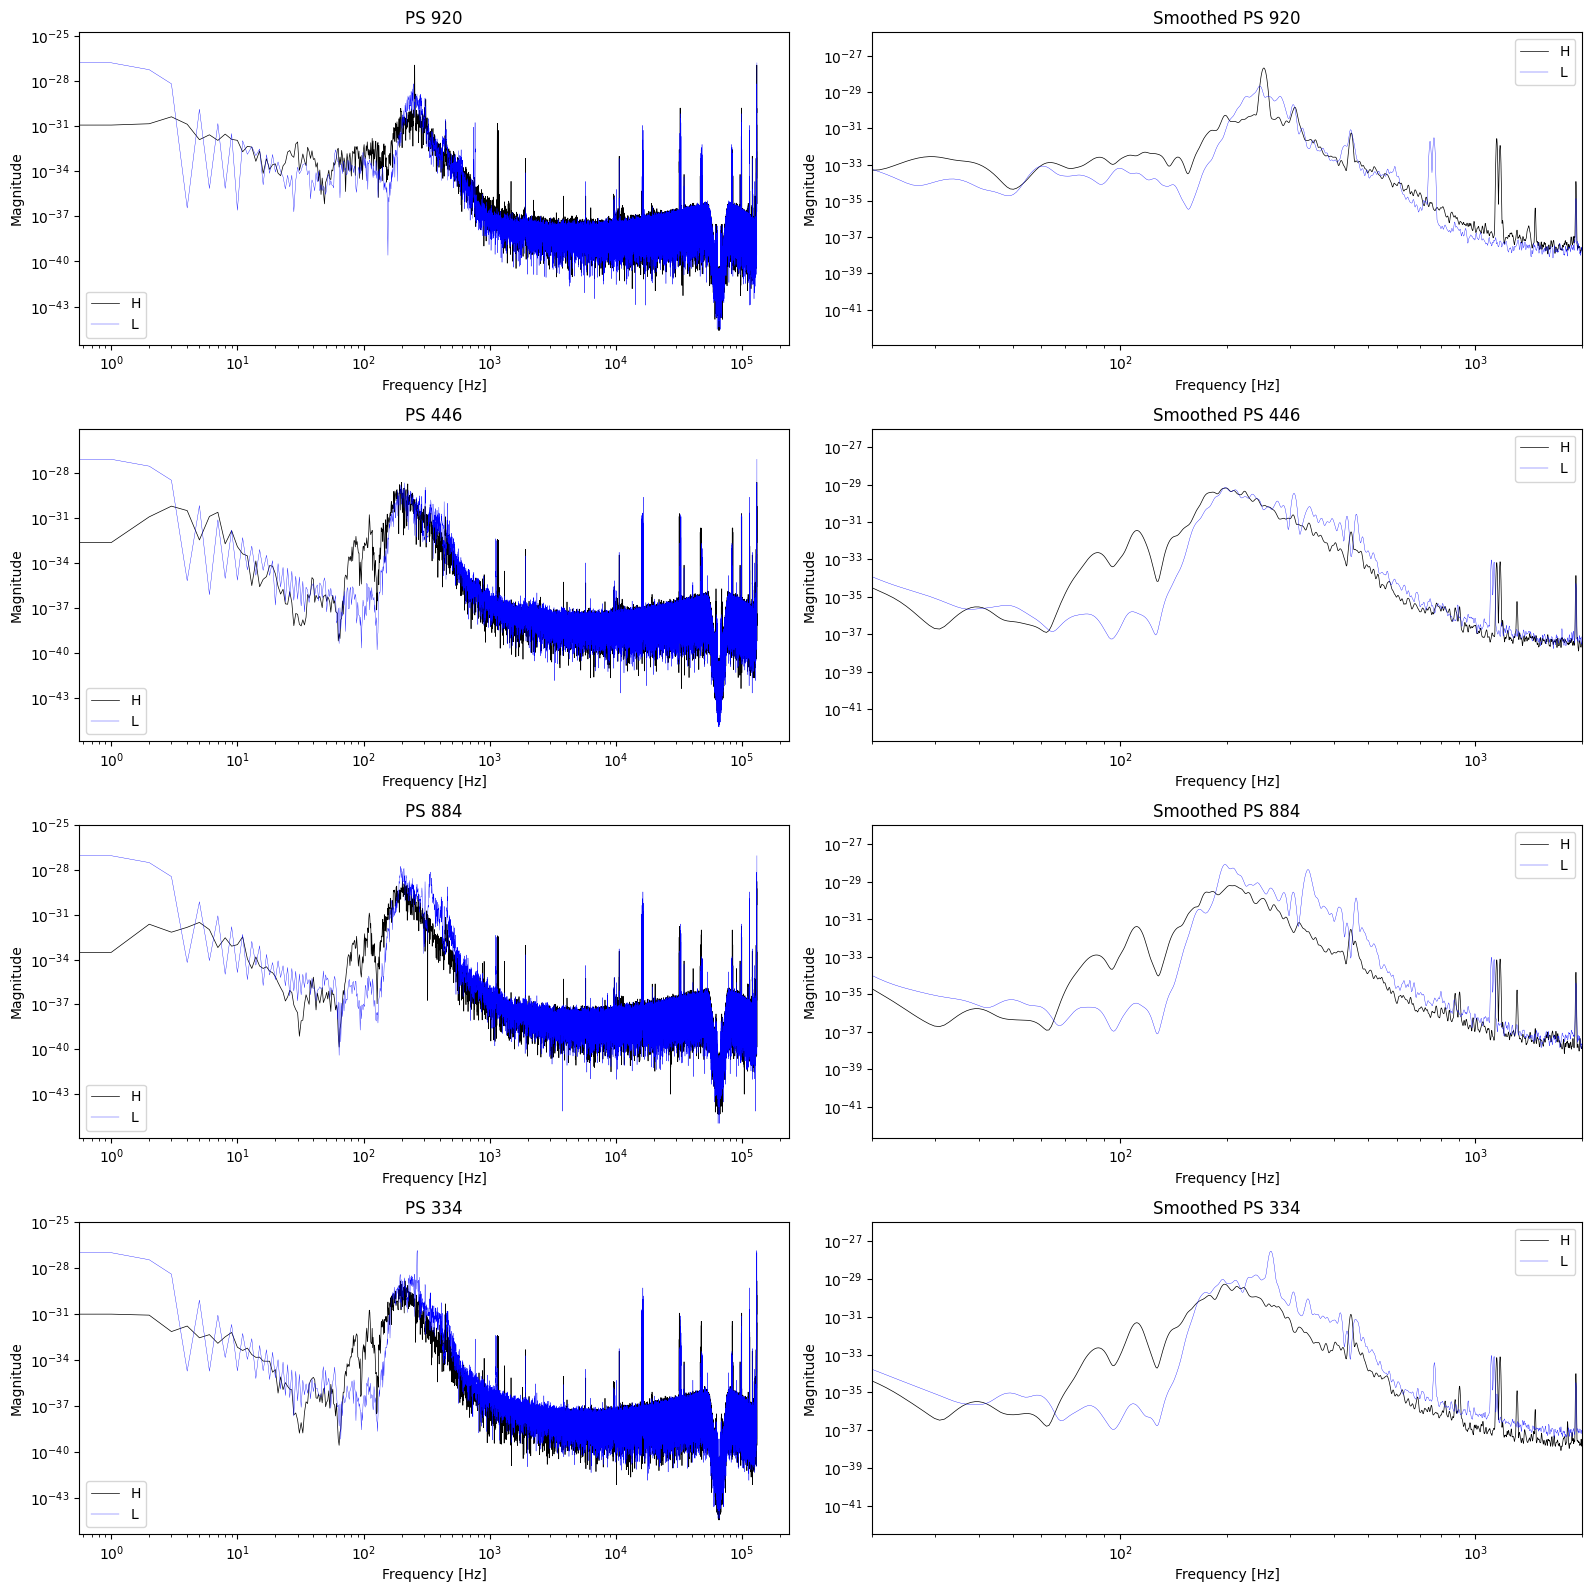

In [175]:
#################part (a)#################

def smooth_vector(vec,sig):
    n=len(vec)
    x=np.longdouble(np.arange(n))
    x[n//2:]=x[n//2:]-n
    kernel=np.exp(-0.5*x**2/sig**2) #make a Gaussian kernel
    kernel=kernel/kernel.sum()
    vecft=np.fft.rfft(vec)
    kernelft=np.fft.rfft(kernel)
    vec_smooth=np.fft.irfft(vecft*kernelft) #convolve the data with the kernel
    return vec_smooth

#window tukey
NL=len(strainH1)
wind=signal.windows.tukey(NL)

#frequency domain
fH1=np.arange(NL)*(1/dtH1)
# fL1=np.arange(NL)*(1/dtL1)
#ps
H1N=[]
L1N=[]
#noises from smoothed PS
H1Ns=[]
L1Ns=[]

plt.figure(figsize=(16,16))
plt.clf()
for i in range(len(Hs)): 
    strainH1,dtH1,utcH1=Hs[i]
    strainL1,dtL1,utcL1=Ls[i]
    H1PS=np.abs(np.fft.fft(strainH1*wind))**2
    L1PS=np.abs(np.fft.fft(strainL1*wind))**2
    H1N.append(H1PS)
    L1N.append(L1PS)
    
    plt.subplot(4,2,2*i+1)
    #plot power spectra
    plt.loglog(H1PS, '-k', linewidth=0.5, label = "H")
    plt.loglog(L1PS, '-b', linewidth=0.25, label = "L")
    plt.legend()
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.title('PS {}'.format(HLst[i]))
       
    plt.subplot(4,2,2*i+2)
    #plot smoothed data
    ssig=3
    smH1=smooth_vector(H1PS, ssig)
    smL1=smooth_vector(L1PS, ssig)
    H1Ns.append(smH1)
    L1Ns.append(smL1)

    plt.loglog(smH1, '-k', linewidth=0.5, label = "H")
    plt.loglog(smL1, '-b', linewidth=0.25, label = "L")
    plt.xlim(20, 2000)#limit domain as per LIGO
    plt.legend()
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.title('Smoothed PS {}'.format(HLst[i]))
    plt.tight_layout(pad=1.0)


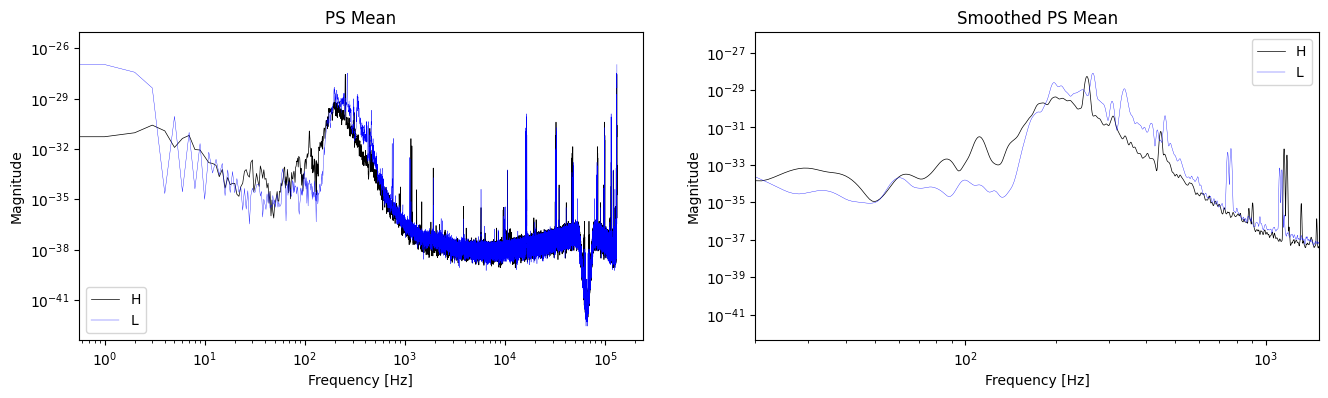

In [174]:
#mean noise
#plot power spectra
plt.figure(figsize=(16,4))
plt.clf()
plt.subplot(1,2,1)
H1Nm=np.mean(H1N, axis=0)
L1Nm=np.mean(L1N, axis=0)
plt.loglog(H1Nm, '-k', linewidth=0.5, label = "H")
plt.loglog(L1Nm, '-b', linewidth=0.25, label = "L")
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.title('PS Mean')
#plot smoothed data
plt.subplot(1,2,2)

smH1m=smooth_vector(H1Nm, ssig)
smL1m=smooth_vector(L1Nm, ssig)

plt.loglog(smH1m, '-k', linewidth=0.5, label = "H")
plt.loglog(smL1m, '-b', linewidth=0.25, label = "L")
plt.xlim(20, 1500)#limit domain as per LIGO
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.title('Smoothed PS Mean')
plt.show()


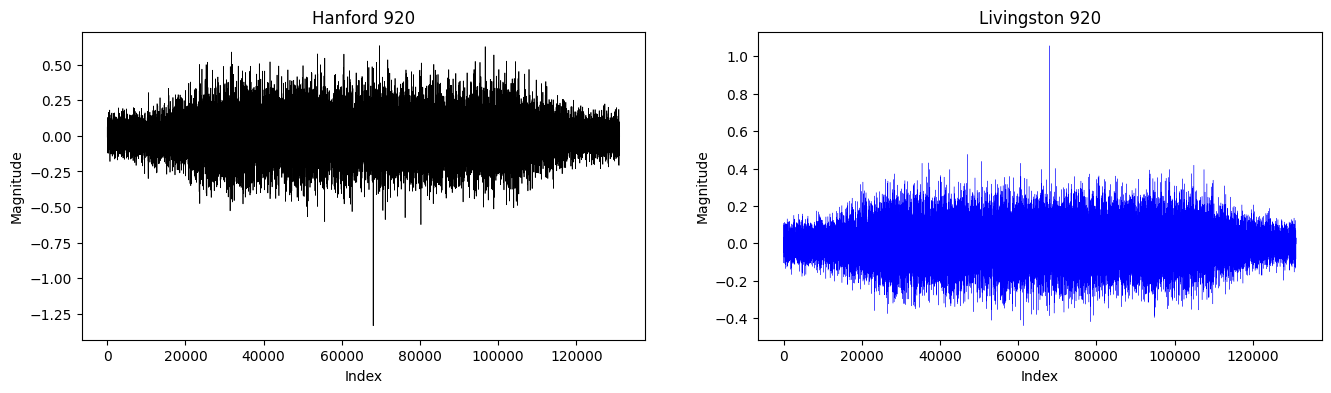

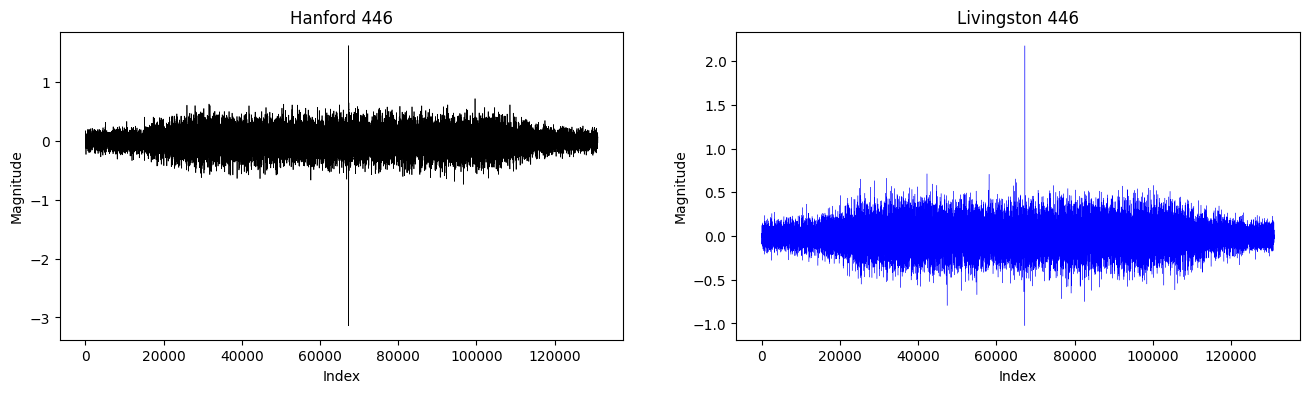

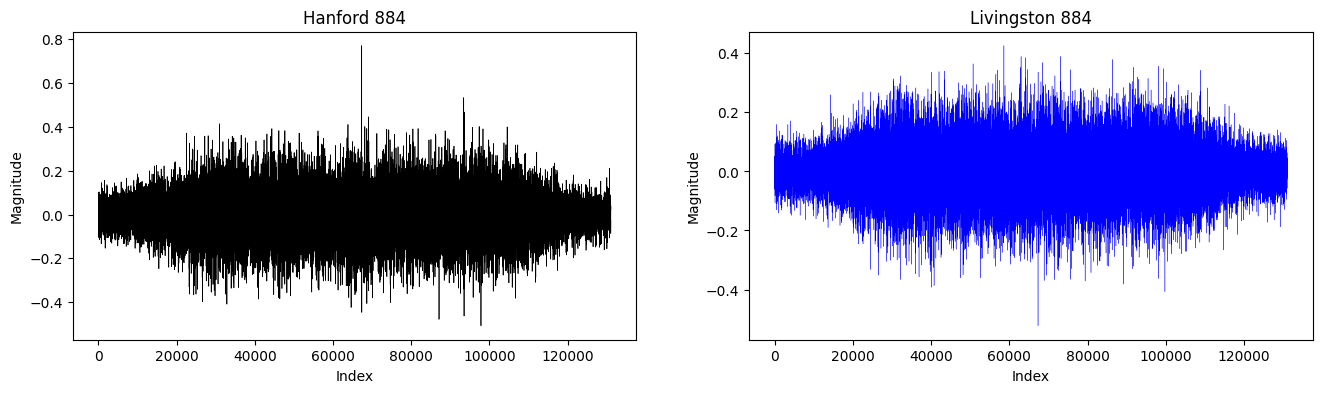

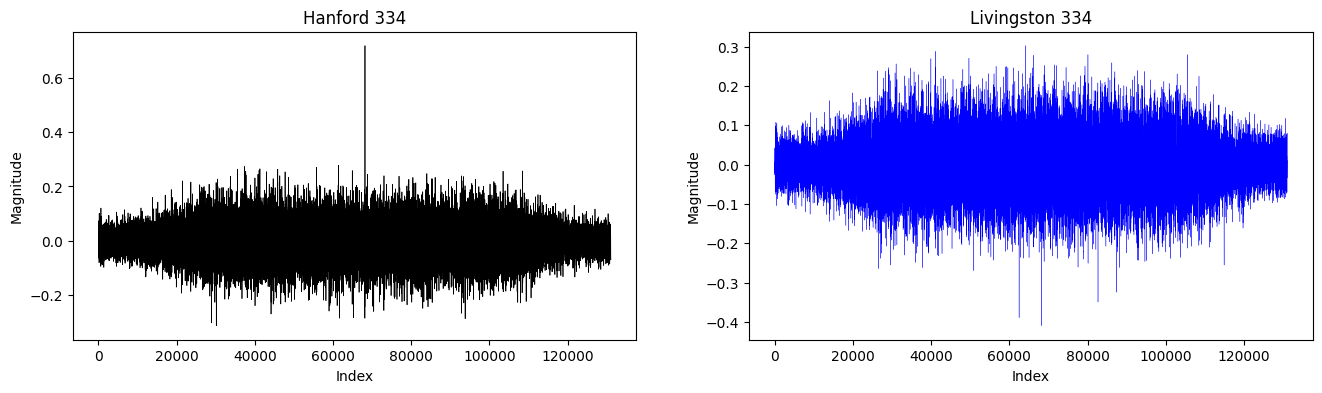

In [257]:
#################parts (b)(c)(d)(e)#################

#noise inverse
Hinv=1/H1Nm
Linv=1/L1Nm

#remove nonsensible noise
nsk=np.arange(len(H1Nm))*(1/(dtH1*len(strainH1)))
nsk[0]=0.5*nsk[1]
Hinv[nsk>2000]=0
Hinv[nsk<20]=0
Linv[nsk>2000]=0
Linv[nsk<20]=0

nss=nsk[:len(nsk)//2+1]#adjust length
Hinv=Hinv[:len(Hinv)//2+1]#adjust length
Linv=Linv[:len(Linv)//2+1]#adjust length

#SNR arrays
HSN=[]
LSN=[]
#analytic
HAN=[]
LAN=[]
#halfpoints
HH=[]
LH=[]
#detect time
DT=[]
    
for i in range(len(Ts)):
    
    strainH1,dtH1,utcH1=Hs[i]
    strainL1,dtL1,utcL1=Ls[i]
    
    #whitened strain
    Hwhite=np.sqrt(Hinv)*np.fft.rfft(strainH1*wind)
    Lwhite=np.sqrt(Linv)*np.fft.rfft(strainL1*wind)
    
    #template info
    tp,tx=Ts[i] #use plus polarization
    TwhiteH=np.sqrt(Hinv)*np.fft.rfft(tp*wind)#whitened template
    TwhiteL=np.sqrt(Linv)*np.fft.rfft(tp*wind)#whitened template
    
    Hmatch=np.fft.irfft(Hwhite*np.conj(TwhiteH))
    Lmatch=np.fft.irfft(Lwhite*np.conj(TwhiteL))
    
    #experimental snr
    hsnr=np.max(np.abs(Hmatch))/np.std(Hmatch)
    lsnr=np.max(np.abs(Lmatch))/np.std(Lmatch)
    HSN.append(hsnr)
    LSN.append(lsnr)
    
    #analytic snr
    Hsum=np.sum((np.fft.irfft(TwhiteH))**2)
    Lsum=np.sum((np.fft.irfft(TwhiteL))**2)
    Hm=Hmatch/Hsum
    Lm=Lmatch/Lsum
    hns=1/np.sqrt(len(strainH1)*Hsum)
    lns=1/np.sqrt(len(strainH1)*Lsum)
  
    ahsnr=np.max(np.abs(Hm))/hns
    alsnr=np.max(np.abs(Lm))/lns
    HAN.append(ahsnr)
    LAN.append(alsnr)
    
    #halfpoint - take weighted average of the whitened templated spectra
    Hhalf=np.sum(nss*np.abs(TwhiteH)**2)/np.sum(np.abs(TwhiteH)**2)
    Lhalf=np.sum(nss*np.abs(TwhiteL)**2)/np.sum(np.abs(TwhiteL)**2)
    HH.append(Hhalf)
    LH.append(Lhalf)
    
    #time detect - identify the greatest magnitude signal data point index
    HM=np.fft.fftshift(Hmatch)
    LM=np.fft.fftshift(Lmatch)
    Hi=np.argmax(np.abs(HM))
    Li=np.argmax(np.abs(LM))
    DT.append(dtH1*np.abs(Hi-Li))# converted to seconds based on time increment of domain
    
    plt.figure(figsize=(16,4))
    plt.clf()
    plt.subplot(1,2,1)
    plt.xlabel("Index")
    plt.ylabel("Magnitude")
    plt.title("Hanford {}".format(HLst[i]))
    plt.plot(HM, '-k', linewidth=0.5)
    plt.subplot(1,2,2)
    plt.xlabel("Index")
    plt.ylabel("Magnitude")
    plt.title("Livingston {}".format(HLst[i]))
    plt.plot(LM, '-b', linewidth=0.25)


    plt.show()

In [326]:
#SNR for each trial _ H _ L _ H&L
print("SNR Observed")
print("Trial HSNR    LSNR   H&LSNR")
for i in range(len(HSN)):
    print("{} {} {} {}".format(HLst[i],np.round(HSN[i],5),np.round(LSN[i],5), np.round(np.sqrt(HSN[i]**2+LSN[i]**2),5)))

print("SNR Analytic")
#Analytic SNR for each trial _ H _ L _ H&L
print("Trial HSNR    SNR    H&LSNR")
for i in range(len(HSN)):
    print("{} {} {} {}".format(HLst[i],np.round(HAN[i],5),np.round(LAN[i],5), np.round(np.sqrt(HAN[i]**2+LAN[i]**2),5)))

print("Halfpoint f[Hz]")
#Analytic SNR for each trial _ H _ L _ H&L
print("Trial     H          L")
for i in range(len(HSN)):
    print("{} {} {}".format(HLst[i], np.round(HH[i],5), np.round(LH[i],5)))


SNR Observed
Trial HSNR    LSNR   H&LSNR
920 9.78756 10.39028 14.27426
446 18.94175 14.17345 23.65749
884 7.44171 5.69467 9.37061
334 11.06002 6.13425 12.64726
SNR Analytic
Trial HSNR    SNR    H&LSNR
920 9.9768 8.79905 13.30262
446 19.31355 14.77288 24.31566
884 7.37907 5.62539 9.27877
334 10.63241 6.80546 12.62388
Halfpoint f[Hz]
Trial     H          L
920 107.82239 120.65234
446 111.9782 123.61566
884 101.69997 115.29871
334 108.8097 126.15353


In [318]:
tspan=dtH1*len(strainH1)
dcrow=3041.1e3#Hanford-Livingston Crow's Distance [m]
c=2.998e8#speed of light [m/s]
derrt=dtH1*20*np.sqrt(2)#20 index increment to locate signal
theta=[]
stheta=[]
print("Trial     dt_detect[s]     dtheta[rad]   Sdtheta[rad]")
for i in range(len(DT)):
    ang=np.arcsin(c*DT[i]/(dcrow))
    sang=(c*derrt/dcrow)/(np.sqrt(1-(c*DT[i]/dcrow)))
    print("{} {} {}".format(HLst[i], np.round(tspan*DT[i],5), np.round(ang,5)))
    theta.append(ang)
    stheta.append(sang)
    
    
print("Mean dt={}±{}[s]".format(np.round(np.mean(DT),5),np.round(derrt,5)))
print("Mean dtheta={}±{}[rad]".format(np.round(np.mean(theta),5),np.round(np.mean(stheta),5)))

Trial     dt_detect[s]     dtheta[rad]   Sdtheta[rad]
920 0.10156 0.31823
446 0.23438 0.80675
884 0.01562 0.04815
334 0.03906 0.12063
Mean dt=0.00305±0.00691[s]
Mean dtheta=0.32344±0.884[rad]


In [288]:
len(strainH1)*dtH1

32.0

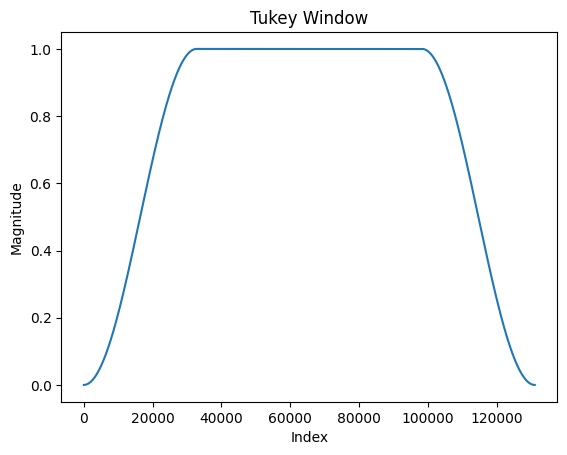

In [329]:
plt.clf()
plt.xlabel("Index")
plt.ylabel("Magnitude")
plt.title("Tukey Window")
plt.plot(wind)
plt.show()